In [131]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12,6)

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

In [132]:
data = pd.read_csv('dataset/Data-Jumlah-Siswa-dan-Guru-Sekolah-Menengah-Atas-SMA.csv', delimiter=',', encoding='latin-1')
data.head()

,nama_sekolah,npsn,bp,status,guru,pd,kecamatan,wilayah
0,SMAN 26 JAKARTA,20102218,SMA,Negeri,36,633,Tebet,Jakarta Selatan
1,SMAN 37 JAKARTA,20102213,SMA,Negeri,46,750,Tebet,Jakarta Selatan
2,SMAN 8 JAKARTA,20102568,SMA,Negeri,58,1040,Tebet,Jakarta Selatan
3,SMAS 17 AGUSTUS 45 JAKARTA,20107274,SMA,Swasta,5,333,Tebet,Jakarta Selatan
4,SMAS ASISI JAKARTA,20107278,SMA,Swasta,18,159,Tebet,Jakarta Selatan


"Berisi tentang daftar sekolah menengah atas di DKI Jakarta baik negeri maupun swasta yang dilengkapi dengan jumlah peserta didik, jumlah guru per wilayah dan per kecamatan."

guru = jumlah guru
<br>pd = jumlah peserta didik
wilayah

https://data.go.id/dataset/data-jumlah-siswa-dan-guru-sekolah-menengah-atas-sma

In [133]:
data.wilayah.value_counts()

Jakarta Timur       121
Jakarta Barat       119
Jakarta Selatan     104
Jakarta Utara        88
Jakarta Pusat        57
Kepulauan Seribu      1
Name: wilayah, dtype: int64

In [134]:
used_col = ['guru','pd','wilayah']
data = data[used_col]
data.columns = ['teacher','student','region']
data['region_id'] = data['region'].factorize()[0]
data.sample(5)

,teacher,student,region,region_id
214,8,100,Jakarta Pusat,2
106,16,120,Jakarta Utara,1
275,0,30,Jakarta Selatan,0
369,56,858,Jakarta Timur,4
339,20,313,Jakarta Barat,3


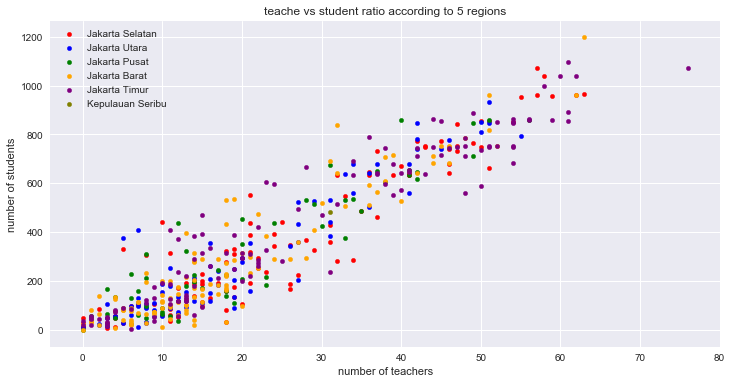

In [135]:
colors = ["red", "blue" , "green", "orange", "purple", 'olive']

for i in range(len(colors)):
    teacher = data[data['region_id'] == data['region_id'].unique()[i]]['teacher']
    student = data[data['region_id'] == data['region_id'].unique()[i]]['student']
    plt.scatter(teacher, student, c=colors[i], s=20, label=data[data['region_id'] == data['region_id'].unique()[i]]['region'].unique()[0])

plt.title('teache vs student ratio according to 5 regions')
plt.xlabel('number of teachers')
plt.ylabel('number of students')
plt.legend()

In [136]:
scaler = preprocessing.MinMaxScaler()
data['teacher'] = scaler.fit_transform(data['teacher'].values.reshape(-1, 1))
data['student'] = scaler.fit_transform(data['student'].values.reshape(-1, 1))

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
teacher,490.0,0.299893,0.219564,0.0,0.131579,0.236842,0.473684,1.0
student,490.0,0.291364,0.241941,0.0,0.083751,0.205931,0.514829,1.0
region_id,490.0,2.138776,1.504297,0.0,1.000000,2.000000,3.000000,5.0


Text(0.5,0,u'teacher/student')

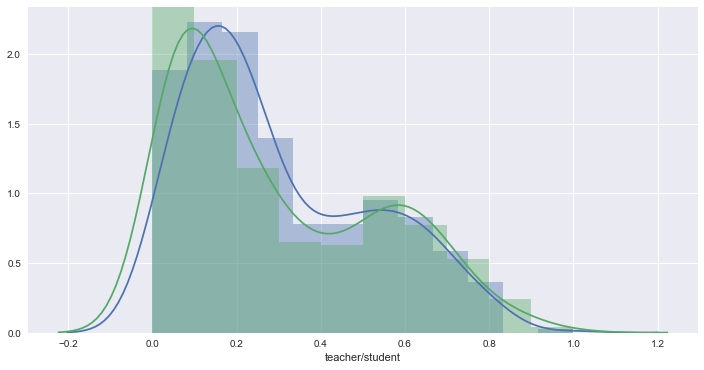

In [137]:
plot_teacher = sns.distplot(data['teacher'])
plot_student = sns.distplot(data['student'])
plt.xlabel('teacher/student')

In [138]:
teacher = data['teacher'].values
student = data['student'].values

X=data.iloc[:,[0,1]].values

For cluster = 3, the shilouette coefficient is 0.536000
For cluster = 4, the shilouette coefficient is 0.476153
For cluster = 5, the shilouette coefficient is 0.442540
For cluster = 6, the shilouette coefficient is 0.406629
For cluster = 7, the shilouette coefficient is 0.402582
For cluster = 8, the shilouette coefficient is 0.411062


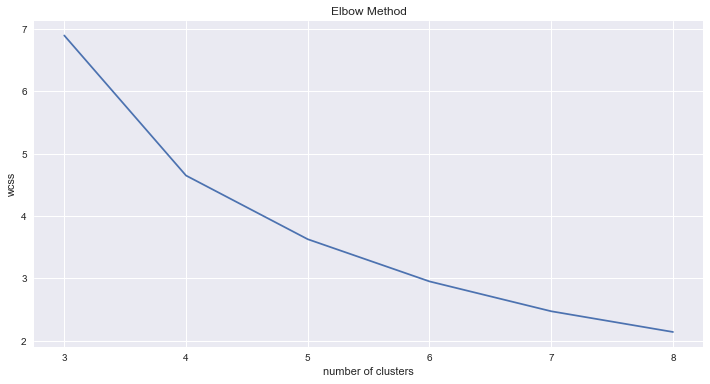

In [139]:
wcss = []

for i in range(3,9):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    label = kmeans.labels_
    silhoutte_coeff = silhouette_score(X, label, metric='euclidean')
    print('For cluster = %i, the shilouette coefficient is %f' % (i,silhoutte_coeff))
    
plt.plot(range(3,9),wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [140]:
# fitting with 4 clusters

kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = kmeans_4.fit_predict(X)

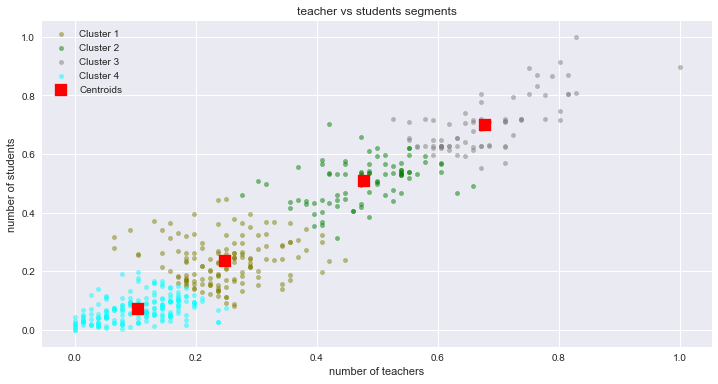

In [141]:
# data_plot = data.reset_index().values

#Visualizing the clusters for k=4
plt.figure(figsize=(12,6))

plt.scatter(X[y_means==0,0],X[y_means==0,1],s=20, c='olive',label='Cluster 1', alpha=0.5)
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=20, c='green',label='Cluster 2', alpha=0.5)
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=20, c='gray',label='Cluster 3', alpha=0.5)
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=20, c='cyan',label='Cluster 4', alpha=0.5)
# # cluster centers
plt.scatter(kmeans_4.cluster_centers_[:,0], kmeans_4.cluster_centers_[:,1], s=150, marker='s', c='red', label='Centroids')
plt.title('teacher vs students segments')
plt.xlabel('number of teachers')
plt.ylabel('number of students')
plt.legend()
plt.show()

Teacher vs Student ratio

The correlation is positive. Each cluster shows the growth in the ratio between teacher and students. However, as the number of students increase there should be more teacher in the class. The ratio could be improved to achieve better quality of education.

In [142]:
data[['teacher','student']].corr()

,teacher,student
teacher,1.000000,0.942395
student,0.942395,1.000000


source: https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac